<a href="https://colab.research.google.com/github/Hgup45/Hgup45/blob/main/Codebasics_NN_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digits classification

In [ ]:
!pip install tensorflow

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

import the dataset from keras library

In [47]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
len(x_train)

60000

In [9]:
len(y_test)

10000

In [10]:
len(x_test)

10000

In [11]:
len(y_train)

60000

In [16]:
x_train[5].shape

(28, 28)

In [ ]:
x_train[0]

In [29]:
x_test[0].shape

(28, 28)

In [27]:
y_train[0]

5

How to check it as it is like an image

In [ ]:
plt.matshow(x_train[0])

In [26]:
y_train[0]

5

In [ ]:
plt.matshow(x_test[0])

In [31]:
y_test[0]

7

In [35]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

flatten the dataset 2D array (28,28) to 1D array 748

In [36]:
x_train.shape

(60000, 28, 28)

In [51]:
x_train = x_train /255
x_test = x_test /255

In [52]:
x_train_flattened = x_train.reshape(len(x_train) , 784) #28*28
x_test_flattened = x_test.reshape(len(x_test) , 784) #28*28
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Creating simple neural network

In [54]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])#api

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #to make it more accurate

model.fit(x_train_flattened, y_train, epochs=5) #epoch are the iterations ur NN will run the training
#scaling the data tends to improve the accuracy, so we went up again and divided all the color value which was max 255, by 255.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4642 - accuracy: 0.8798
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9255


Evaluate the model

In [56]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.9252


[0.26654377579689026, 0.9251999855041504]

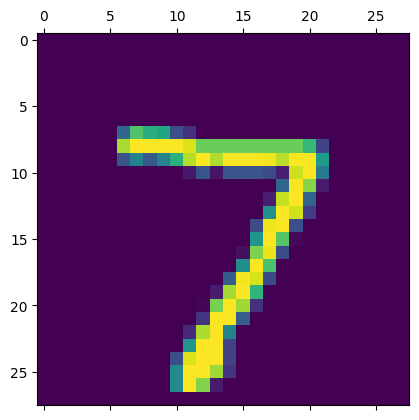

In [63]:
plt.matshow(x_test[0])

In [58]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([1.9511856e-02, 5.2599512e-07, 5.6991775e-02, 9.7574806e-01,
       2.5172448e-03, 1.0249381e-01, 2.4430515e-06, 9.9979568e-01,
       1.1275468e-01, 6.6128051e-01], dtype=float32)

In [61]:
np.argmax(y_predicted[0])

7

In [64]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [65]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    4,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   6,    9,  928,   17,    9,    3,   12,   13,   32,    3],
       [   2,    0,   20,  932,    0,   18,    2,   12,   17,    7],
       [   1,    1,    4,    2,  910,    0,   12,    7,   10,   35],
       [   9,    3,    4,   40,   12,  762,   15,    9,   31,    7],
       [  12,    3,    6,    1,    7,    9,  917,    2,    1,    0],
       [   1,    5,   22,    7,    4,    0,    0,  962,    3,   24],
       [   8,    9,    8,   33,    9,   24,    9,   13,  852,    9],
       [  11,    7,    1,   13,   25,    5,    0,   31,    3,  913]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

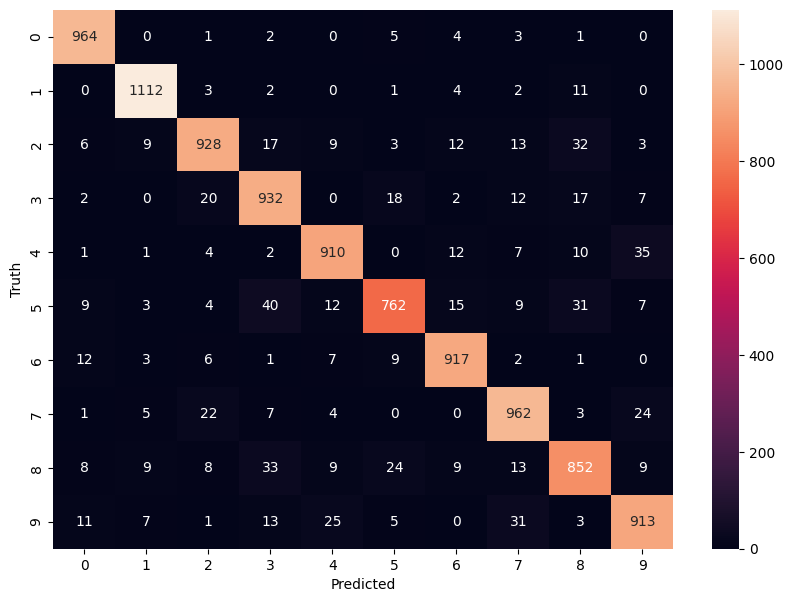

In [66]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [67]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2654 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1202 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0837 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0634 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0508 - accuracy: 0.9845


In [68]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0821 - accuracy: 0.9769


[0.08207002282142639, 0.9768999814987183]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

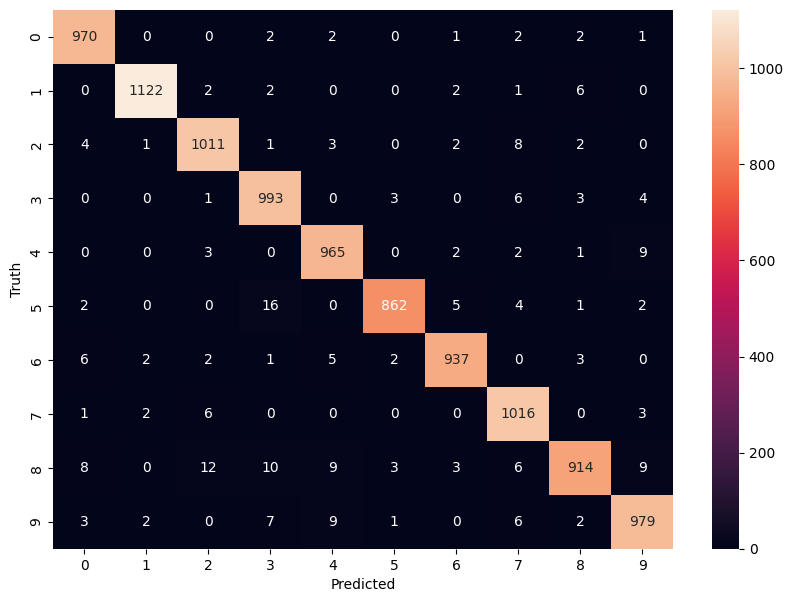

In [71]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [72]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2797 - accuracy: 0.9200
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1280 - accuracy: 0.9622
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0887 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0674 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0536 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0428 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.019

In [74]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9745


[0.08628824353218079, 0.9745000004768372]